<a href="https://colab.research.google.com/github/dajeong25/Study/blob/main/python_big_data/%EB%B9%85%EB%B6%84%EA%B8%B0_%EC%8B%A4%EA%B8%B0_%EC%A0%9C2%EC%9C%A0%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 제 2유형 빅데이터 분석 과정 - 분류

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
list(df.species.unique())

['setosa', 'versicolor', 'virginica']

### 데이터 전처리

In [ ]:
# 텍스트로 되어 있는 species 컬럼의 데이터를 0, 1, 2로 변환한다.
num = 0
for s in list(df.species.unique()):
  df['species'].replace(s, num, inplace=True)
  num += 1
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 분석 데이터셋 준비 > get_shape

In [ ]:
def get_shape(data):
  for i in data:
    print(i.shape)

In [ ]:
# X는 독립변수(설명변수), y는 종속변수(목표변수)
# 8:2로 분리, 시드값은 11로 고정
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

get_shape([X_train, X_test, y_train, y_test])

(120, 4)
(30, 4)
(120,)
(30,)


### 데이터 분석 수행(DecisionTreeClassifier)

In [ ]:
dtc = DecisionTreeClassifier(random_state=11)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

### 성능평가 및 시각화

In [ ]:
# 모델 성능 - 정확도 측정
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(acc)

0.9333333333333333


In [ ]:
# 모델 성능 - 오차행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[ 9,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  9]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



# 지도학습 - 분류

## 의사결정나무
타이타닉 데이터셋에서 생존여부 예측

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 데이터 전처리
1. Age 컬럼의 결측값을 평균으로 대치
2. Embarked 컬럼의 결측값을 최빈값으로 대치
3. Sex 컬럼의 값을 1과 0으로 레이블인코딩
4. Embarked 컬럼의 값을 레이블인코딩
5. SibSp, Parch의 값을 더해서 FamilySize 컬럼(파생변수)을 생성

In [ ]:
from sklearn.preprocessing import LabelEncoder

df['Age'].fillna(df.Age.mean(), inplace=True)
df.Embarked.fillna(df.Embarked.mode(), inplace=True)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])
df['FamiltSize'] = df['SibSp'] + df['Parch']
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamiltSize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,NaN,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C85,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,NaN,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,C123,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,NaN,2,0


### 데이터 분석
- 결측치 너무 많은 Cabin 제외
- 영향 x : id, name, ticket 제외

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'FamiltSize'],
      dtype='object')

In [ ]:
# X는 독립변수(설명변수), y는 종속변수(목표변수)
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamiltSize']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

get_shape([X_train, X_test, y_train, y_test])

(712, 6)
(179, 6)
(712,)
(179,)


In [ ]:
dtc = DecisionTreeClassifier(random_state=11)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7877094972067039

## KNN
> iris 데이터 셋 사용

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 데이터 전처리

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

mms = MinMaxScaler()
for col in list(X.columns):
  X[[col]] = mms.fit_transform(X[[col]])

X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=11)
get_shape([X_train, X_test, y_train, y_test])

(120, 4)
(30, 4)
(120,)
(30,)


### 데이터 분석

In [ ]:
from sklearn.metrics import accuracy_score

# knn 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

acc = accuracy_score(y_test, pred)
print(acc)

0.9333333333333333


In [ ]:
# 의사결정나무
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=11)
dtc.fit(X_train, y_train)

pred_dtc = dtc.predict(X_test)
acc = accuracy_score(y_test, pred_dtc)
print(acc)

0.9333333333333333


In [ ]:
# knn 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

acc = accuracy_score(y_test, pred)
print(acc)

0.9333333333333333


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
mat = confusion_matrix(y_test, pred)
print(mat)

[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]


In [ ]:
rpt = classification_report(y_test, pred)
print(rpt)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



## SVM
> 데이터 셋 : 타이타닉 생존여부

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 데이터 전처리
1. Age 컬럼의 결측값을 평균으로 대치
2. Embarked 컬럼의 결측값을 최빈값으로 대치
3. SibSp, Parch의 값을 더해서 FamilySize 컬럼(파생변수)을 생성
4. Sex 컬럼의 값을 1과 0으로 원-핫 인코딩 
5. Embarked 컬럼의 값을 원-핫 인코딩

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['FamilySize'] = df['SibSp'] + df['Parch']
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

onehot_s = pd.get_dummies(df['Sex'])
df = pd.concat([df, onehot_s], axis=1)

onehot_e = pd.get_dummies(df['Embarked'])
df = pd.concat([df, onehot_e], axis=1)

df.drop(['Sex', 'Embarked'], axis=1)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0,1,0,0,1


In [ ]:
X = df[['Pclass', 'Age', 'Fare', 'FamilySize', 'female', 'male', 'C', 'Q', 'S']]
y = df['Survived']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=11)
get_shape([X_train3, X_test3, y_train3, y_test3])

(623, 9)
(268, 9)
(623,)
(268,)


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=11)
get_shape([X_train2, X_test2, y_train2, y_test2])

(712, 9)
(179, 9)
(712,)
(179,)


### 데이터 분석

In [ ]:
def get_svm_basic(X, y, test_size):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=11)
  # get_shape([X_train, X_test, y_train, y_test])
  sv = svm.SVC(kernel = 'rbf')
  sv.fit(X_train, y_train)
  pred = sv.predict(X_test)
  acc = accuracy_score(y_test, pred)
  mat = confusion_matrix(y_test, pred)
  rpt = classification_report(y_test, pred)
  return sv, pred, acc, mat, rpt

In [ ]:
pred_save = list()
for test_size in [0.2, 0.3]:
  sv, pred, acc, mat, rpt = get_svm_basic(X, y, test_size)
  pred_save.append(pred)
  print('정확도 =', acc)
  print(mat)
  print(rpt)
  print()

정확도 = 0.7206703910614525
[[110   8]
 [ 42  19]]
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       118
           1       0.70      0.31      0.43        61

    accuracy                           0.72       179
   macro avg       0.71      0.62      0.62       179
weighted avg       0.72      0.72      0.68       179


정확도 = 0.6977611940298507
[[162  14]
 [ 67  25]]
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       176
           1       0.64      0.27      0.38        92

    accuracy                           0.70       268
   macro avg       0.67      0.60      0.59       268
weighted avg       0.68      0.70      0.66       268




In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'FamilySize', 'female', 'male', 'C', 'Q',
       'S'],
      dtype='object')

### 성능 높이기 > 커널 사용

In [ ]:
help(svm.SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  

In [ ]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

params = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001, 0.00001, 1, 10]}
grid_cv = GridSearchCV(svm.SVC(), params, verbose=1, cv=10)
grid_cv.fit(X_train, y_train)
print('Best Paramters:', grid_cv.best_params_)
print('Best Estimators:', grid_cv.best_estimator_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
Best Paramters: {'C': 100, 'gamma': 0.001}
Best Estimators: SVC(C=100, gamma=0.001)


In [ ]:
svc1 = svm.SVC(kernel='rbf')
svc2 = svm.SVC(kernel='rbf', C=100, gamma=0.001)
svc3 = svm.SVC(kernel='linear', C=100, gamma=0.001)

for model in [svc1, svc2, svc3]:
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc = accuracy_score(y_test, pred)
  print(model, '정확도 =', acc)

SVC() 정확도 = 0.6536312849162011
SVC(C=100, gamma=0.001) 정확도 = 0.7932960893854749
SVC(C=100, gamma=0.001, kernel='linear') 정확도 = 0.7932960893854749


## 로지스틱 회귀
> iris 데이터셋

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 데이터 전처리

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]\

for col in X.columns:
  scaler = MinMaxScaler()
  X[[col]] = scaler.fit_transform(X[[col]])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
get_shape([X_train, X_test, y_train, y_test])

(120, 4)
(30, 4)
(120,)
(30,)


### 데이터 분석

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, pred)
print(acc)

0.8333333333333334


## 랜던 포레스트
> 타이타닉 데이터셋

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 데이터 전처리
1. Age 컬럼의 결측값을 평균으로 대치
2. Embarked 컬럼의 결측값을 최빈값으로 대치
3. Sex 컬럼의 값을 1과 0으로 레이블인코딩
4. Embarked 컬럼의 값을 레이블인코딩
5. SibSp, Parch의 값을 더해서 FamilySize 컬럼(파생변수)을 생성

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode(), inplace=True)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])
df['FamilySize'] = df['SibSp'] + df['Parch']
df.drop(['SibSp', 'Parch', 'Cabin'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,0


In [ ]:
X = df[['Pclass', 'Age', 'Fare', 'Sex', 'Embarked', 'FamilySize']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
get_shape([X_train, X_test, y_train, y_test])

(712, 6)
(179, 6)
(712,)
(179,)


In [ ]:
rf = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=20)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
acc = accuracy_score(y_test, pred)
print(acc)

0.8659217877094972


# 회귀

## 단순 선형회귀분석
> UCI 자동차 연비 데이터 : https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv

== y값(종속변수)은 mpg 연비

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
count,398.000000,398.000000,398.000000,396.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.189394,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.402030,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


> horsepower 결측치 존재

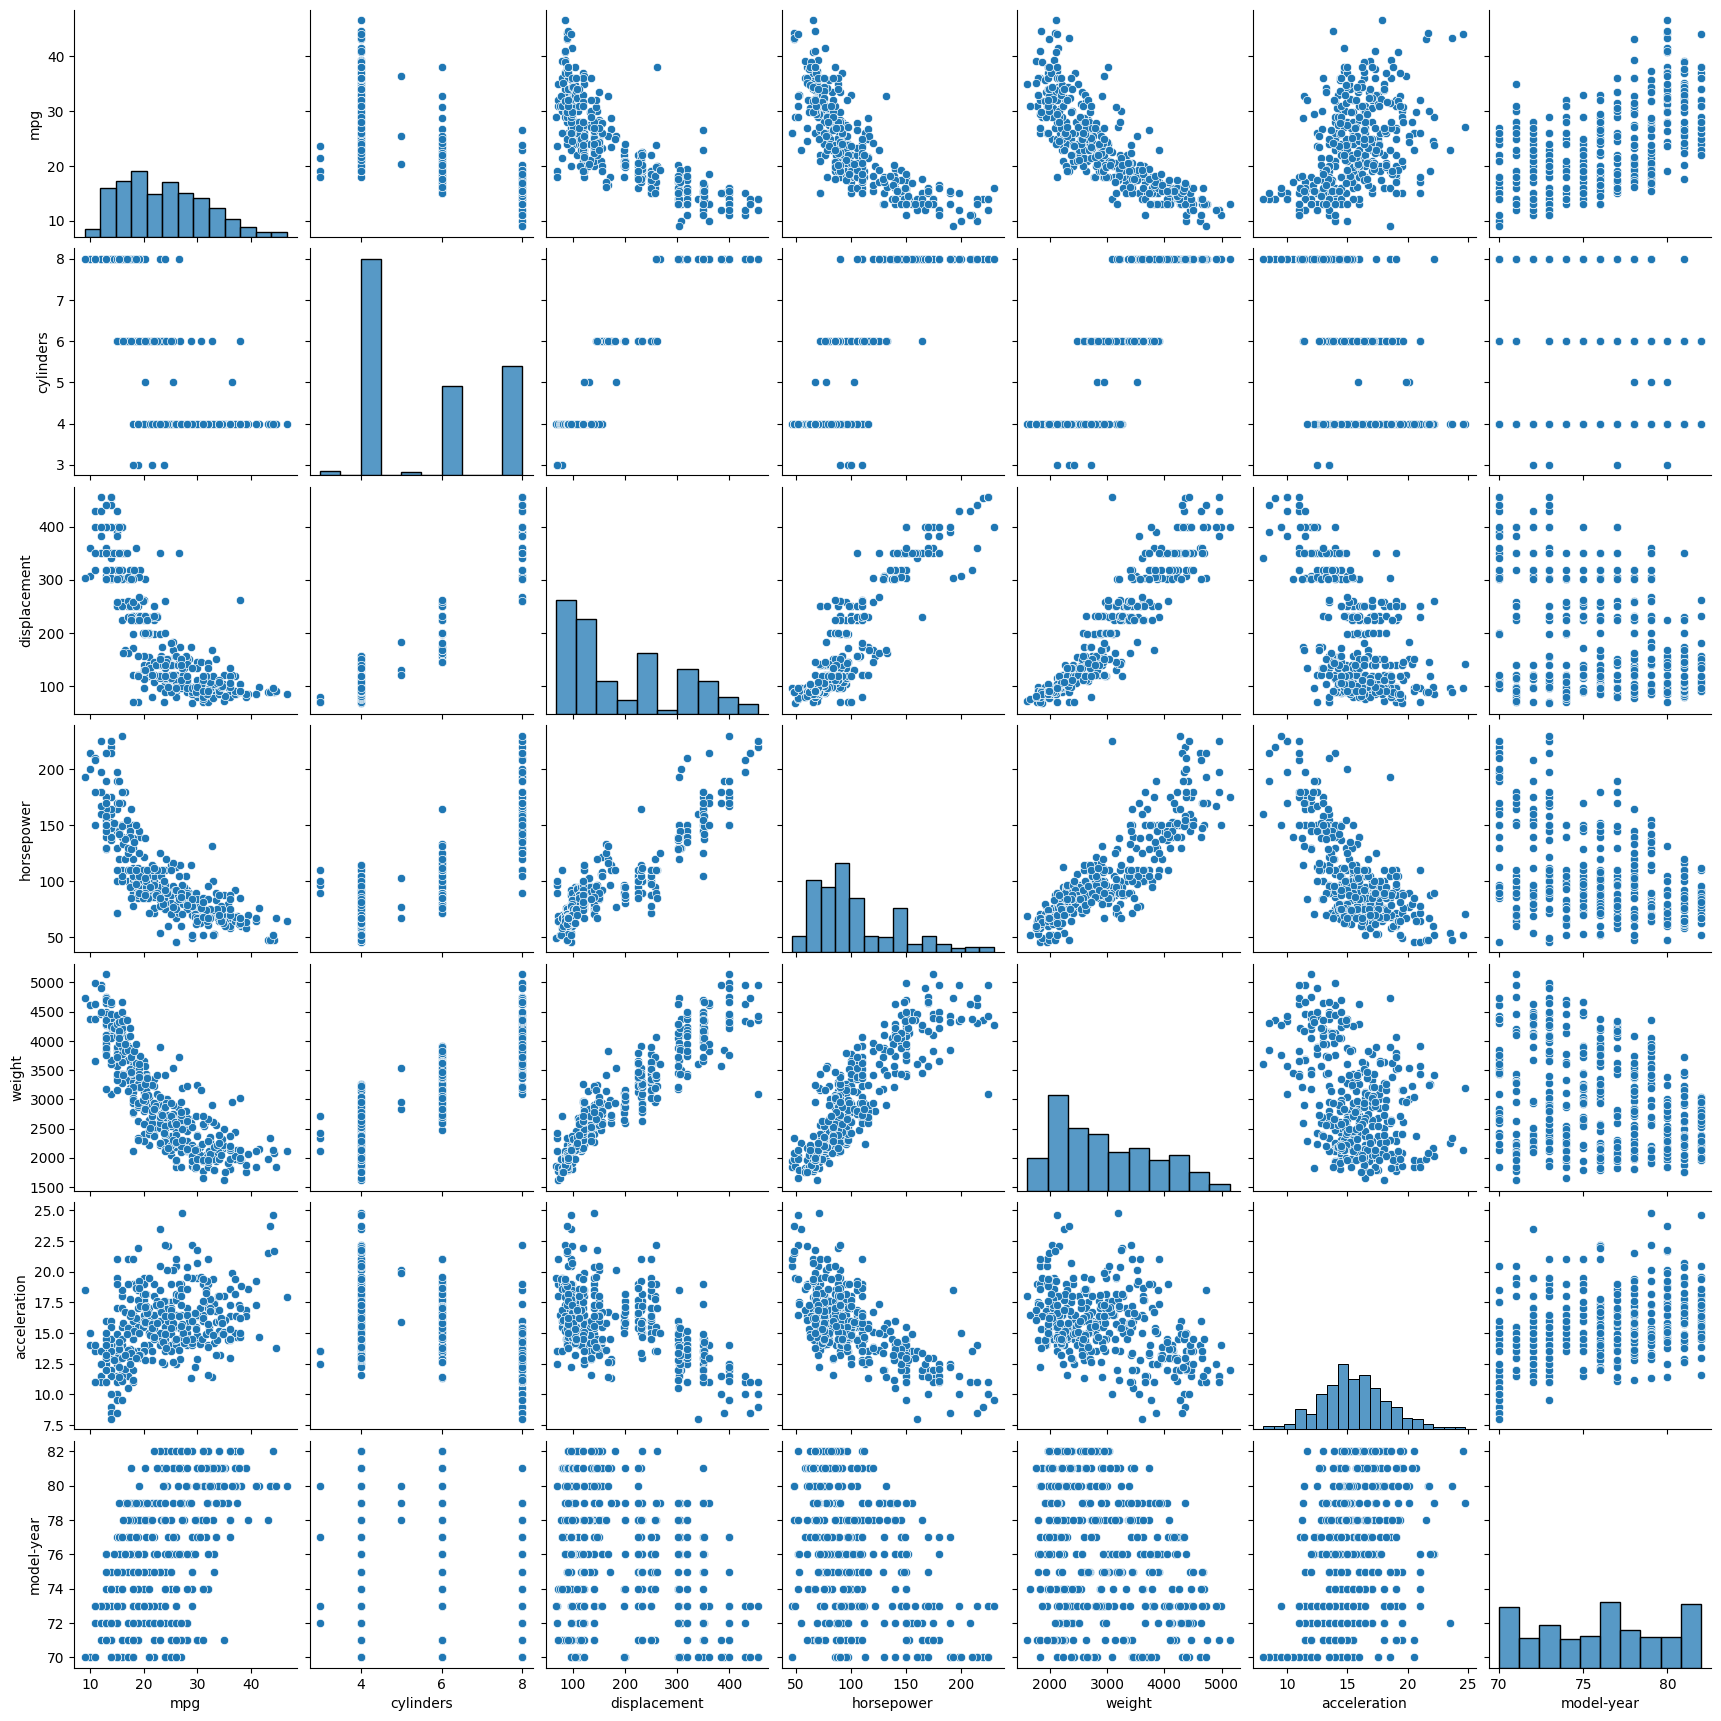

In [ ]:
import seaborn as sns
sns.pairplot(df)

displacement	horsepower	weight >> 이렇게 음의 연관관계 존재

### 데이터 전처리
> 결측치 행 삭제

In [ ]:
df = df.dropna()

### 데이터 분석

In [ ]:
from sklearn.metrics import r2_score
for col_X in ['displacement', 'horsepower', 'weight']:
  X = df[[col_X]]
  y = df['mpg']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
  
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  print(col_X, '기울기 a =', lr.coef_)
  print(col_X, 'y절편 b =', lr.intercept_)

  pred = lr.predict(X_test)
  score = r2_score(y_test, pred)
  print(col_X, '성능 평가 =', score)

displacement 기울기 a = [-0.05891406]
displacement y절편 b = 34.8021030890489
displacement 성능 평가 = 0.5982311264818292
horsepower 기울기 a = [-0.15331988]
horsepower y절편 b = 39.46988560736385
horsepower 성능 평가 = 0.5780544812335405
weight 기울기 a = [-0.00760176]
weight y절편 b = 45.92494220674336
weight 성능 평가 = 0.6128515290885201


> 생각보다 성능이 좋지 않음. 70% 이상으로 올리려면 어떻게 해야할까?

In [ ]:
corr = df.corr(method='pearson')
print(corr)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775680     -0.804711   -0.777575 -0.832725   
cylinders    -0.775680   1.000000      0.950706    0.843751  0.896058   
displacement -0.804711   0.950706      1.000000    0.897787  0.932729   
horsepower   -0.777575   0.843751      0.897787    1.000000  0.864350   
weight       -0.832725   0.896058      0.932729    0.864350  1.000000   
acceleration  0.421159  -0.504844     -0.542713   -0.687241 -0.415462   
model-year    0.581144  -0.352554     -0.374620   -0.420697 -0.311774   

              acceleration  model-year  
mpg               0.421159    0.581144  
cylinders        -0.504844   -0.352554  
displacement     -0.542713   -0.374620  
horsepower       -0.687241   -0.420697  
weight           -0.415462   -0.311774  
acceleration      1.000000    0.294588  
model-year        0.294588    1.000000  


> cylinders는 상관관계에선느 강한 음의 관계를 가지고 있는데, 시각화에서는 그런 영향이 안 보임. 왜 그런거지???